In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
players = pd.read_csv("/content/drive/MyDrive/Transfermakt/players.csv")
player_valuations = pd.read_csv("/content/drive/MyDrive/Transfermakt/player_valuations.csv")
appearences = pd.read_csv("/content/drive/MyDrive/Transfermakt/appearances.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tables:
- player_club_domestic_competition_id
-

# EDA

## Market Prices in years

## data from 2024 valueations

<BarContainer object of 14 artists>

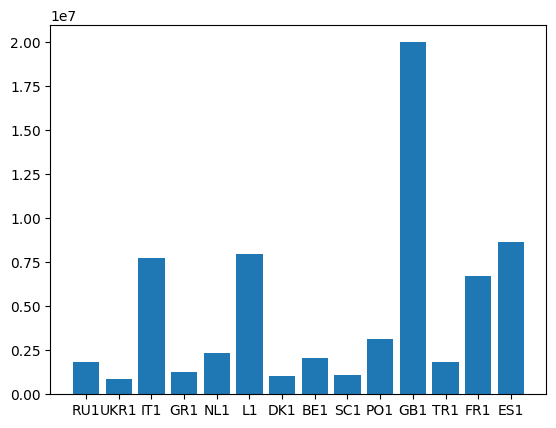

In [34]:
data24 = player_valuations[player_valuations.index.year == 2024]

mean_prices = [
    (i, data24[data24['player_club_domestic_competition_id'] == i]['market_value_in_eur'].mean())
    for i in data24['player_club_domestic_competition_id'].unique()
]

competitions = [x[0] for x in mean_prices]
prices = [x[1] for x in mean_prices]

plt.bar(competitions, prices)


In [38]:
data24

,player_id,market_value_in_eur,current_club_id,player_club_domestic_competition_id
date,,,,
2024-01-04,490496,300000,3719,RU1
2024-01-04,634023,1000000,53646,UKR1
2024-01-04,814273,400000,2410,RU1
2024-01-04,984708,1500000,276,IT1
2024-01-05,486132,1000000,60949,GR1
...,...,...,...,...
2024-12-27,1121298,1000000,366,ES1
2024-12-27,1124005,5000000,3709,ES1
2024-12-27,1146029,1000000,472,ES1


## premier league

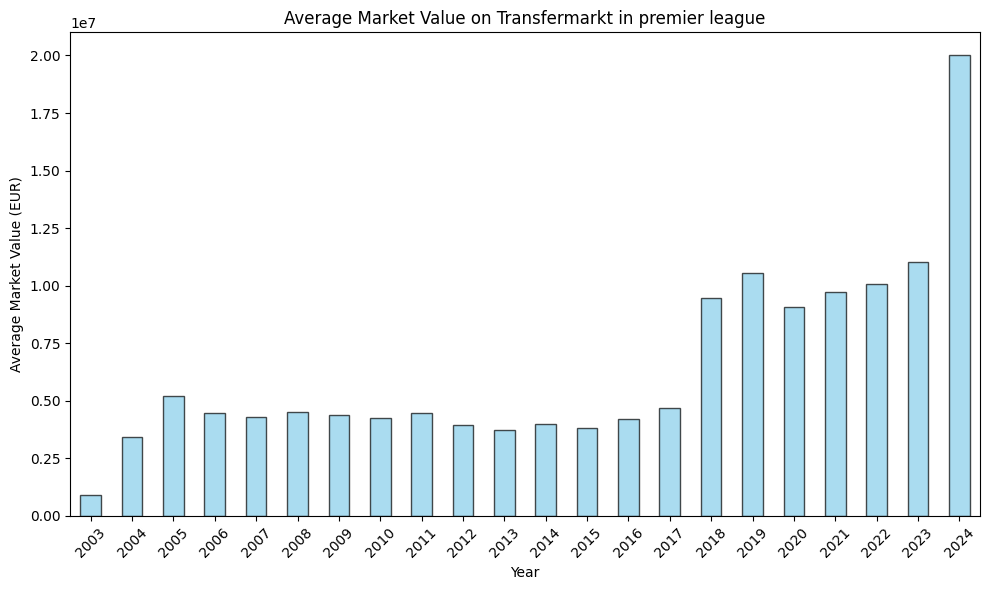

In [ ]:
mean_values_by_year = player_valuations[player_valuations['player_club_domestic_competition_id'] == "GB1"].resample('Y')['market_value_in_eur'].mean()
mean_values_by_year.index = mean_values_by_year.index.year

plt.figure(figsize=(10, 6))
mean_values_by_year.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Average Market Value on Transfermarkt in premier league')
plt.xlabel('Year')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

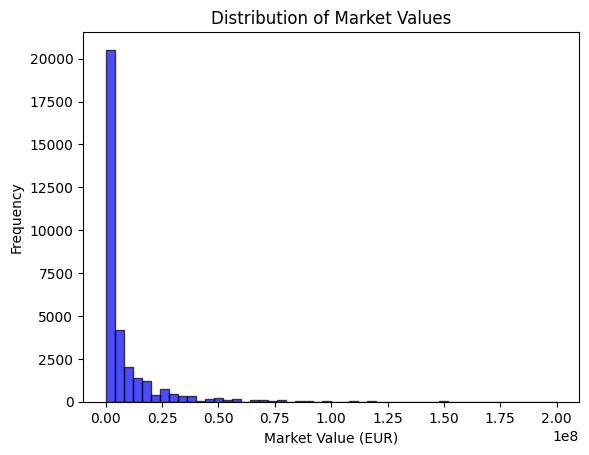

In [ ]:
player_valuations_GB1 = player_valuations[player_valuations['player_club_domestic_competition_id'] == "GB1"]
plt.hist(player_valuations_GB1['market_value_in_eur'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Market Values in premier league')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Frequency')
plt.show()

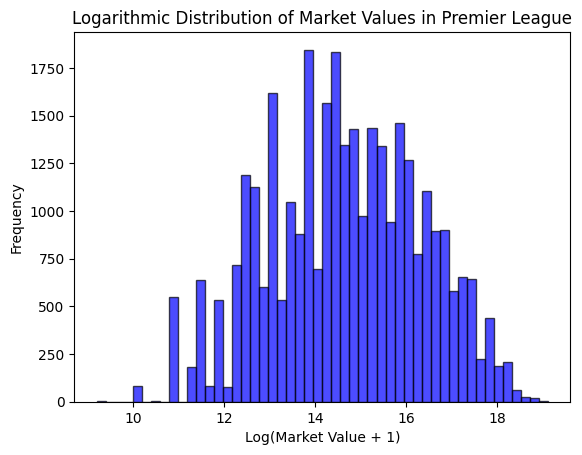

In [ ]:
player_valuations_GB1 = player_valuations[player_valuations['player_club_domestic_competition_id'] == "GB1"]

log_market_values = np.log1p(player_valuations_GB1['market_value_in_eur'])

plt.hist(log_market_values, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Logarithmic Distribution of Market Values in Premier League')
plt.xlabel('Log(Market Value + 1)')
plt.ylabel('Frequency')
plt.show()

value_range
<1M          9862
1M-5M       11181
5M-10M       4218
10M-50M      6520
50M-100M      836
>100M         111
Name: count, dtype: int64


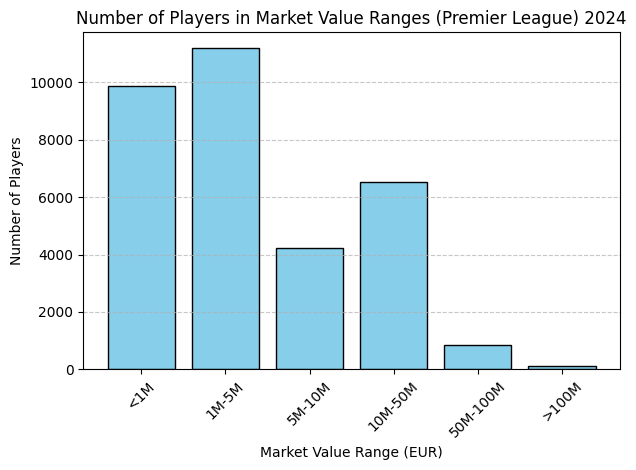

In [ ]:
bins = [0, 1_000_000, 5_000_000, 10_000_000, 50_000_000, 100_000_000, 500_000_000]
labels = ['<1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '>100M']

player_valuations_PL_24 = player_valuations[
    (player_valuations['player_club_domestic_competition_id'] == "GB1") &
    (player_valuations.index.year == 2024)
    ]
player_valuations_PL_24['value_range'] = pd.cut(player_valuations_PL_24['market_value_in_eur'], bins=bins, labels=labels, right=False)

value_counts = player_valuations_GB1['value_range'].value_counts().sort_index()

print(value_counts)

plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue', edgecolor='black')
plt.title('Number of Players in Market Value Ranges (Premier League) 2024')
plt.xlabel('Market Value Range (EUR)')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


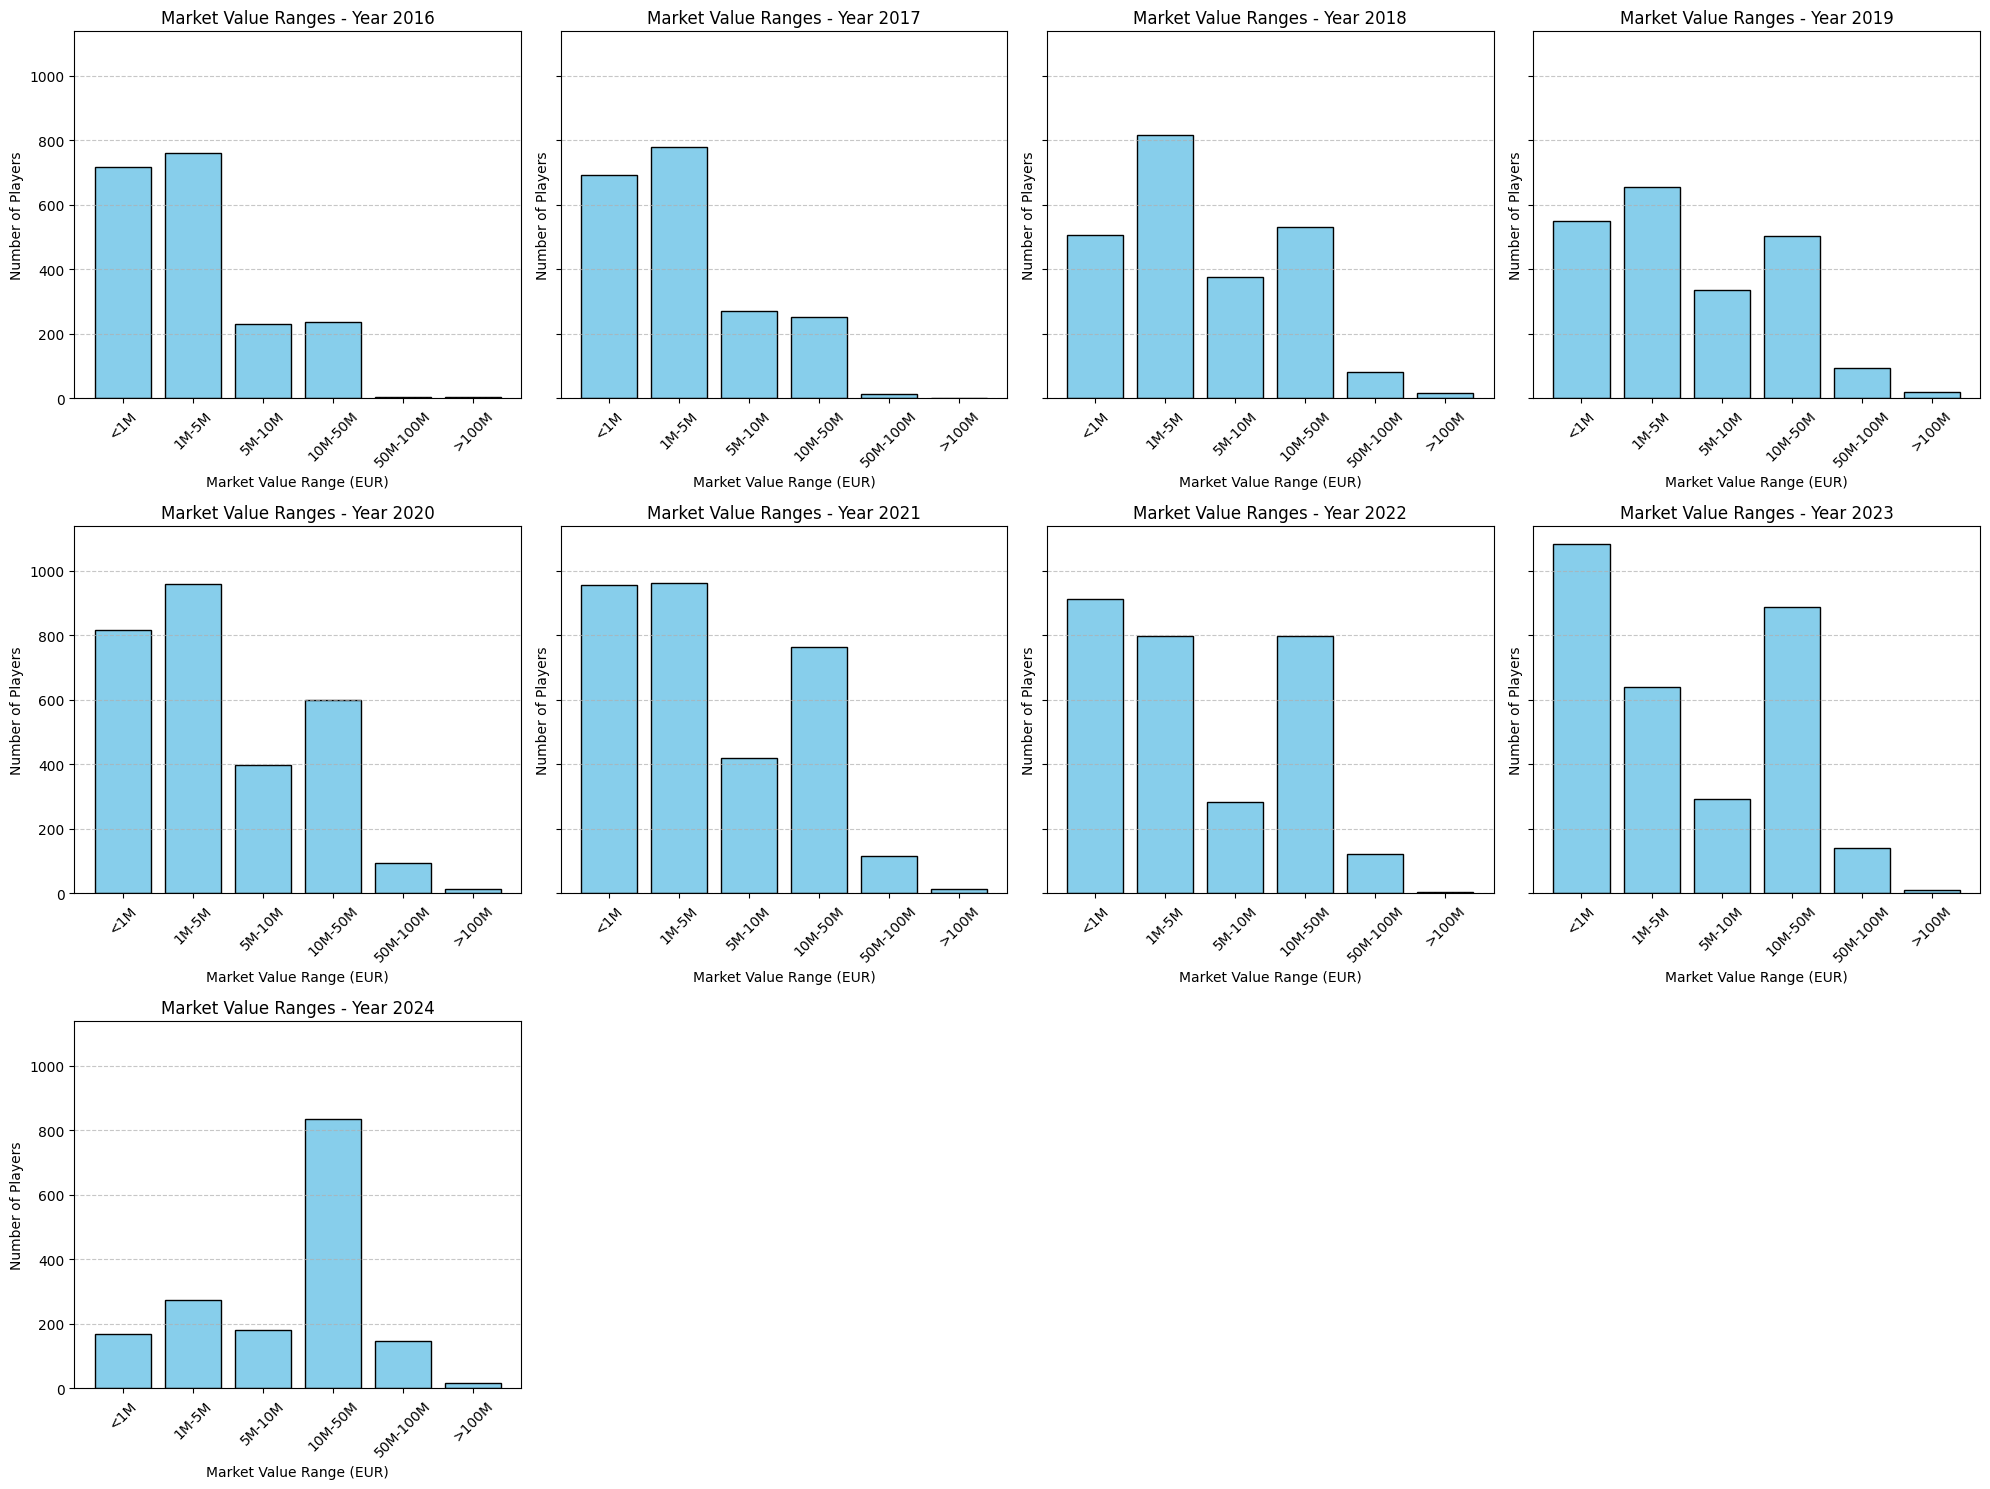

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define bins and labels
bins = [0, 1_000_000, 5_000_000, 10_000_000, 50_000_000, 100_000_000, 500_000_000]
labels = ['<1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '>100M']

# Add a year column for grouping
player_valuations['year'] = player_valuations.index.year

# Filter for Premier League players
player_valuations_PL = player_valuations[
    player_valuations['player_club_domestic_competition_id'] == "GB1"
]

# Create value range categories
player_valuations_PL['value_range'] = pd.cut(
    player_valuations_PL['market_value_in_eur'], bins=bins, labels=labels, right=False
)

# Group by year and calculate value range counts
yearly_counts = (
    player_valuations_PL.groupby(['year', 'value_range'])
    .size()
    .unstack(fill_value=0)
)

# Filter data for years from 2016 onward
yearly_counts_filtered = yearly_counts.loc[yearly_counts.index >= 2016]

# Plotting
num_years = yearly_counts_filtered.index.nunique()
fig, axes = plt.subplots(
    (num_years // 4) + (1 if num_years % 4 != 0 else 0), 4,
    figsize=(20, 15),
    sharey=True
)
axes = axes.flatten()

for i, year in enumerate(yearly_counts_filtered.index):
    value_counts = yearly_counts_filtered.loc[year]
    axes[i].bar(value_counts.index.astype(str), value_counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Market Value Ranges - Year {year}')
    axes[i].set_xlabel('Market Value Range (EUR)')
    axes[i].set_ylabel('Number of Players')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## players and statistics

In [42]:
appearences.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0.0,0.0,2.0,0.0,90.0
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0.0,0.0,0.0,0.0,90.0
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0.0,0.0,0.0,0.0,45.0
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0.0,0.0,0.0,0.0,90.0
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0.0,0.0,0.0,1.0,90.0


In [48]:
players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [62]:
players25 = players[
    (players['current_club_domestic_competition_id'] == 'L1') &
    (players['last_season'] == 2024)
    ]

In [66]:
football_players_values = []
for i in players25['current_club_id'].unique():
    club_name = players25[players25['current_club_id'] == i]['current_club_name'].iloc[0]
    avg_value = player_valuations[player_valuations['current_club_id'] == i]['market_value_in_eur'].mean()
    football_players_values.append((club_name, avg_value))

('FC Bayern München', 16869992.608277902)

In [ ]:
football_players_values = []
for i in players25['current_club_id'].unique():
    club_name = players25[players25['current_club_id'] == i]['current_club_name'].iloc[0]
    avg_value = player_valuations[player_valuations['current_club_id'] == i]['market_value_in_eur'].mean()
    football_players_values.append((club_name, avg_value))

df_values = pd.DataFrame(football_players_values, columns=['club_name', 'average_value'])

top_10_clubs = df_values.sort_values(by='average_value', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_clubs['club_name'], top_10_clubs['average_value'])
plt.xlabel('Club Name')
plt.ylabel('Average Player Value (€)')
plt.title('Top 10 Clubs by Average Player Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
